### 모델비교

- [o] 공통 데이터 전처리 완료
- [o] 개별 모델 실험을 통한 피처 엔지니어링 진행 완료 `10/15: columns.json → use_yn 체크후 next 진행`
- [-] 최종 피처 데이터를 통한 모델 성능 비교 및 최적화 
- [-] 최종 모델 선택

In [15]:
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import numpy as np
from pathlib import Path
sys.path.append(str(Path("").resolve().parent.parent))

In [18]:
from preprocess import preprocessing_data, featuring_data, drop_feature, columns_dict
import pandas as pd 

ROOT_DIR = Path("").resolve().parent.parent
DATA_DIR = ROOT_DIR / "data"
PREP_FILE = DATA_DIR / "prep_data_v2.csv"

def rename_to_kor(df):
    """columns.json의 name으로 한글 컬럼명 매핑"""
    rename_map = {
        col: meta["name"]
        for cat in columns_dict.values()
        for col, meta in cat.items()
        if col in df.columns
    }
    return df.rename(columns=rename_map)

# df_merge = preprocessing_data(DATA_PATH)
# df_merge = featuring_data(df_merge)
# df_merge = drop_feature(df_merge)
# 위 전처리 데이터가 prep_data_v2.csv

df = pd.read_csv(PREP_FILE)
df = df.drop(['exmprs_no','wt_p'], axis=1)
print(df.shape)
df.info()

# 최종 피처 선택 필요시 
# fnl_col = df.columns.tolist()
# df = df[fnl_col]

# 한글 매핑 (추가 피처에 대한 한글 매핑 반영 필요)
df_merge_kor = rename_to_kor(df)
df = df_merge_kor.copy()

(89822, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89822 entries, 0 to 89821
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     89822 non-null  float64
 1   sex                     89822 non-null  int64  
 2   CTPRVN_CODE             89822 non-null  int64  
 3   SPOT_NO                 89822 non-null  int64  
 4   mbhld_co                89822 non-null  float64
 5   reside_adult_co         89822 non-null  float64
 6   fma_04z1                89801 non-null  float64
 7   fma_24z2                1095 non-null   float64
 8   nue_01z1                89800 non-null  float64
 9   churn                   89822 non-null  int64  
 10  nua_01z2                89822 non-null  float64
 11  nuc_02z1                89315 non-null  float64
 12  nuc_03z1                19738 non-null  float64
 13  obb_02a1                44065 non-null  float64
 14  obb_02b1                44

### 전처리
- 사용할 컬림 2차 식별 및 수치형, 범주형 구분

In [19]:
# 쓸 칼럼 제외 모두 드랍

drop_cols = [
'만나이',
'표본지점번호',
'가구원수_만19세이상',
'월간가구총소득구간',
'체중조절방법_운동', '체중조절방법_단식', '체중조절방법_무처방약물',
'점심후양치불가이유', '치과미수진이유',
'월간 폭음 경험(남)', '월간 폭음 경험(여)',
'고강도 신체활동 일수', '고강도 신체활동 시간(시)', '고강도 신체활동 시간(분)',
'중강도 신체활동 일수', '걷기 실천 일수',
'평생담배제품사용경험', '일반담배평생흡연량', '가끔흡연자월간흡연일수', '과거흡연자흡연기간_년', '과거흡연자흡연기간_월',
'금연유지기간', '궐련형전자담배평생사용', '궐련형매일사용자하루사용량', '궐련형가끔사용자월간일수',
'궐련형가끔사용자일평균사용량', '액상형전자담배평생사용', '액상형전자담배현재사용', '최근1년금연시도여부', '금연계획',
#'가정내흡연자존재',
'가정간접흡연노출',
#'직장간접흡연노출', '졸업상태', 'age_group', 'is_single',
'house_income', 'house_income_log',
#'house_income_grp', 'fma_dementia_case',
'smoke_avg_per_day'
#'education_group', 'is_economically_active', 'occupation_type', 'is_employee',
#'weight_control_method', 'activity_score_weight', 'activity_score',
]

def drop_feature_ver2(df):
    return df.drop(drop_cols, axis=1).reset_index(drop=True)

df_test = drop_feature_ver2(df)

to_object_col = [
'성별', '시도번호', '기초생활수급자여부', '가구식품안정성여부', '영양표시설인지여부',
'영양표시영향여부', '스트레스상담여부', '구강건강자기평가', '저작불편여부', '점심후양치여부', '저녁양치여부', '화장실각성여부',
'악몽경험여부', '기억력저하여부', '상담여부', '치매검사여부', '가정내흡연자존재', '직장간접흡연노출', '졸업상태',
'age_group', 'is_single', 'house_income_grp', 'fma_dementia_case',
'education_group', 'is_economically_active', 'occupation_type',
'is_employee', 'weight_control_method', 'activity_score'
]

df_test[to_object_col] = df_test[to_object_col].astype('object')

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89822 entries, 0 to 89821
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   성별                      89822 non-null  object 
 1   시도번호                    89822 non-null  object 
 2   가구원수_전체                 89822 non-null  float64
 3   기초생활수급자여부               89801 non-null  object 
 4   가구식품안정성여부               89800 non-null  object 
 5   이탈여부                    89822 non-null  int64  
 6   아침식사빈도                  89822 non-null  float64
 7   영양표시설인지여부               89315 non-null  object 
 8   영양표시영향여부                19738 non-null  object 
 9   구강건강자기평가                89822 non-null  object 
 10  저작불편여부                  89822 non-null  object 
 11  점심후양치여부                 89812 non-null  object 
 12  저녁양치여부                  89817 non-null  object 
 13  평생 음주 여부                89822 non-null  float64
 14  연간 음주 빈도                89820 non-null

### 모델 학습

In [51]:
if 'churn' in df_test.columns: TARGET_NM = 'churn'
else: TARGET_NM = '이탈여부'

from sklearn.model_selection import train_test_split

# 데이터 분리
X = df_test.drop(TARGET_NM, axis=1)
# X[X.select_dtypes(exclude=['number']).columns] = X.select_dtypes(exclude=['number']).astype(float)
y = df_test[TARGET_NM]

# 학습/테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')

# 학습 → 학습/검증
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2)
print(X_train_sub.shape, y_train_sub.shape, X_valid.shape, y_valid.shape, '\n')

(71857, 41) (71857,) (17965, 41) (17965,) 

(57485, 41) (57485,) (14372, 41) (14372,) 



In [75]:
import time 
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

# 각자 탐색한 최적 파라미터를 초기 파라미터로 사용
catb_params = {
    'iterations':500,
    'learning_rate':0.05,
    'depth':6,
    'eval_metric':'Accuracy',
    'verbose':100,
    # 'cat_features':cat_features_names
}
xgb_params = {
    'n_estimators':300,
    'max_depth':6,
    'learning_rate':0.07,
    'subsample':0.9,
    'colsample_bytree':0.9,
    'tree_method':"hist",
    'eval_metric':"aucpr",
    'n_jobs':-1
}
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'class_weight': 'balanced'
}
rf_params = {
    'n_estimators':100,
    'max_depth':10,
    'min_samples_split':5
}
hgb_params = {
    'learning_rate': 0.01,
    'max_depth': 5,
    'max_iter': 300,
    'min_samples_leaf': 29,
    'l2_regularization': 0.3
}

# 모델 정의 
models = {
    "CatBoost": CatBoostClassifier(random_state=2, **catb_params),
    "XGB": XGBClassifier(random_state=2, **xgb_params),
    "LGBM": LGBMClassifier(random_state=2, **lgb_params),
    # "RandomForest": RandomForestClassifier(random_state=2, **rf_params),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=2, **hgb_params)
}

def encoding_catboost(X_df):
    # 범주형 피처의 인덱스 번호 리스트 추출
    cat_features = [i for i, dtype in enumerate(X_df.dtypes) if dtype == 'object']

    # 범주형 컬럼 이름 리스트 추출
    cat_feature_names = [X_df.columns[i] for i in cat_features]

    # 모든 범주형 컬럼 float → 문자열로 변환
    for col in cat_feature_names:
        X_df[col] = X_df[col].replace([np.nan, np.inf, -np.inf], 'missing').astype(str)
        
    return X_df, cat_features

# 학습 및 평가
#-- catboost, xgboost -> category 명시
#-- lgb -> 범주형 카테고리 명시 가능 (like catboost,  'cat_features':cat_features_names)
results = []
for name, model in models.items():

    start = time.perf_counter()
    if name == "CatBoost":
        X_train_enc, cat_features = encoding_catboost(X_train.copy())
        X_test_enc, _ = encoding_catboost(X_test.copy())

        model.fit(X_train_enc, y_train, cat_features=cat_features)
        y_pred = model.predict(X_test_enc)
        y_prob = model.predict_proba(X_test_enc)[:,1]

    elif name == "LGBM":  
        # 범주형 컬럼을 category로 변환시 fit에서 categorical_feature 지정 생략
        for col in X_train.select_dtypes('object').columns:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    elif name == "XGB":
        for col in X_train.select_dtypes('object').columns:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')
        model.set_params(enable_categorical=True)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    elif name == "HistGradientBoosting":
        # sklearn 1.2 이상
        for col in X_train.select_dtypes('object').columns:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    train_time_sec = time.perf_counter() - start
    print(f"{name} | 학습시간(초): {train_time_sec:.3f}")
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    results.append((name, acc, auc, pr_auc))

# 결과 저장
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'ROC_AUC', 'PR_AUC']).sort_values('ROC_AUC', ascending=False)
print('\n')
print(df_results)

0:	learn: 0.6644307	total: 166ms	remaining: 1m 22s
100:	learn: 0.7024925	total: 19.5s	remaining: 1m 16s
200:	learn: 0.7082400	total: 39.2s	remaining: 58.3s
300:	learn: 0.7119696	total: 58.9s	remaining: 38.9s
400:	learn: 0.7138483	total: 1m 18s	remaining: 19.3s
499:	learn: 0.7161167	total: 1m 37s	remaining: 0us
CatBoost | 학습시간(초): 100.078
XGB | 학습시간(초): 2.301
LGBM | 학습시간(초): 0.531
HistGradientBoosting | 학습시간(초): 3.458


                  Model  Accuracy   ROC_AUC    PR_AUC
0              CatBoost  0.707041  0.778440  0.792318
2                  LGBM  0.706151  0.776717  0.791158
3  HistGradientBoosting  0.697356  0.769087  0.782641
1                   XGB  0.692124  0.761414  0.778780


In [76]:
df_results.to_csv('results/model_eval.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pickle

# 모델 저장
with open('results/model_train_result.pkl', 'wb') as f:
    pickle.dump(model, f)

# 예측 결과 저장
df_pred = pd.DataFrame({
    'y_true': y_test,      # 실제값
    'y_pred': y_pred,      # 예측값
    'y_prob': y_prob       # 예측확률
})

# 결과 분석용
df_result = X_test.copy()
df_result['y_true'] = y_test.values
df_result['y_pred'] = y_pred
df_result['y_prob'] = y_prob

df_pred.to_csv('results/model_pred_result.csv', index=False, encoding='utf-8-sig')
df_result.to_csv('results/model_pred_result_analysis.csv', index=False, encoding='utf-8-sig')

### 검증, 하이퍼파라미터 최적화
- 최종 모델 선택해서 gridsearch 진행

In [52]:
# GridSearchCV, cross_val_score
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
import numpy as np
import time

# 베스트 모델  
best_model = df_results[df_results['ROC_AUC']==df_results['ROC_AUC'].max()]['Model'].item()
print(f'베스트 모델: {best_model}')

# 파라미터 후보
param_grid = {}
best_params = catb_params

for k, v in best_params.items():
    if k in ('eval_metric', 'verbose'):
        param_grid[k] = [v]                        
    elif k == 'iterations':
        cand = [max(1, int(round(v*0.7))), v]
        param_grid[k] = cand
    elif k == 'learning_rate':
        param_grid[k] = [v*0.7, v]
    elif k == 'depth':
        cand = [max(1, int(round(v*0.7))), v]
        param_grid[k] = cand                   
    
# 파라미터 조합 생성
param_list = list(ParameterGrid(param_grid))
print(f"총 {len(param_list)}개 조합 탐색\n")

베스트 모델: CatBoost
총 8개 조합 탐색



In [ ]:
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3, 5], 
    'eval_metric': ['Accuracy','AUC','Logloss'],               
    'verbose': [100]
}

param_list = list(ParameterGrid(param_grid))
print(f"총 {len(param_list)}개 조합 탐색\n")

총 36개 조합 탐색



- 다른 모델들(XGBoost, LightGBM, sklearn 계열)은 fit()을 여러 번 호출해도 내부 상태를 초기화하면서 재학습할 수 있음
- CatBoost는 내부적으로 `트리 구조 + 히스토리` 를 캐싱해두기 때문에,
- 이미 한 번 fit()한 모델은 `frozen` 상태로 바뀌고,
- 이 상태에서는 set_params()나 fit()을 다시 호출할 수 없음..

In [ ]:
best_score = -1
best_params_ = None
best_model_ = None
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

for i, params in enumerate(param_list, 1):
    
    print(f"[{i}/{len(param_list)}] 현재 파라미터: {params}")
    start_time = time.time()
       
    # 최적 모델: CatBoost는 새로 객체 생성, 나머지는 set_params() 사용
    if best_model == "CatBoost":
        model = CatBoostClassifier(random_state=2, **params) 
    else:
        model = models[best_model].set_params(**params) 
    
    acc_list, auc_list, pr_auc_list = [], [], []

    # 교차검증 수행 (5-Fold)
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        if best_model == "CatBoost":
            X_tr_enc, cat_features = encoding_catboost(X_tr.copy())
            X_val_enc, _ = encoding_catboost(X_val.copy())

            model.fit(X_tr_enc, y_tr, cat_features=cat_features, early_stopping_rounds=10)
            y_pred = model.predict(X_val_enc)
            y_prob = model.predict_proba(X_val_enc)[:,1]

        else:
            # 캣부스트 아닌 모델에 대한 처리도 필요하지만 pass
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)
            y_prob = model.predict_proba(X_val)[:, 1]

        acc = accuracy_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_prob)
        pr_auc = average_precision_score(y_val, y_prob)

        acc_list.append(acc)
        auc_list.append(auc)
        pr_auc_list.append(pr_auc)

        print(f"Fold {fold}: acc={acc:.4f}, auc={auc:.4f}, pr_auc={pr_auc:.4f}")
    
    mean_acc = np.mean(acc_list)
    mean_auc = np.mean(auc_list)
    mean_pr_auc = np.mean(pr_auc_list)
    elapsed = time.time() - start_time

    print(f"평균 acc={mean_acc:.4f}, auc={mean_auc:.4f}, pr_auc={mean_pr_auc:.4f} | 소요시간: {elapsed:.1f}초\n")

    # 최고 모델 업데이트(AUC 기준)
    if mean_auc > best_score:
        best_score = mean_auc
        best_params_ = params
        best_model_ = model

print("탐색 완료")
print("Best Params:", best_params_)
print("Best Test Accuracy:", best_score)
# CatBoost  0.707041  0.778440  0.792318

In [ ]:
# 테스트셋 : y_train, y_test

# 최적 모델 재학습 및 평가
if best_model == "CatBoost":
    X_train_enc, cat_features = encoding_catboost(X_train.copy())
    X_test_enc, _ = encoding_catboost(X_test.copy())
    best_model_.fit(X_train_enc, y_train, cat_features=cat_features, verbose=False)

    # test
    y_pred = best_model_.predict(X_test_enc)
    y_prob = best_model_.predict_proba(X_test_enc)[:, 1]

    test_acc = accuracy_score(y_test, y_pred)
    test_auc_roc = roc_auc_score(y_test, y_prob)
    test_pr_auc = average_precision_score(y_test, y_prob)
    
    # train
    train_y_pred = best_model_.predict(X_train_enc)
    train_y_prob = best_model_.predict_proba(X_train_enc)[:, 1]

    train_acc = accuracy_score(y_train, train_y_pred)
    train_auc_roc = roc_auc_score(y_train, train_y_prob)
    train_pr_auc = average_precision_score(y_train, train_y_prob)

else:
    best_model_.fit(X_train, y_train)

    # test
    y_pred = best_model_.predict(X_test)
    y_prob = best_model_.predict_proba(X_test)[:, 1]

    test_acc = accuracy_score(y_test, y_pred)
    test_auc_roc = roc_auc_score(y_test, y_prob)
    test_pr_auc = average_precision_score(y_test, y_prob)

    # train
    train_y_pred = best_model_.predict(X_train)
    train_y_prob = best_model_.predict_proba(X_train)[:, 1]

    train_acc = accuracy_score(y_train, train_y_pred)
    train_auc_roc = roc_auc_score(y_train, train_y_prob)
    train_pr_auc = average_precision_score(y_train, train_y_prob)

print(f"\n학습 성능: train_acc={train_acc:.4f}, train_auc_roc={train_auc_roc:.4f}, train_pr_auc={train_pr_auc:.4f}")
print(f"\n평가 성능: test_acc={test_acc:.4f}, test_auc_roc={test_auc_roc:.4f}, test_pr_auc={test_pr_auc:.4f}") # 테스트 셋으로

- 성능 결과 시각화

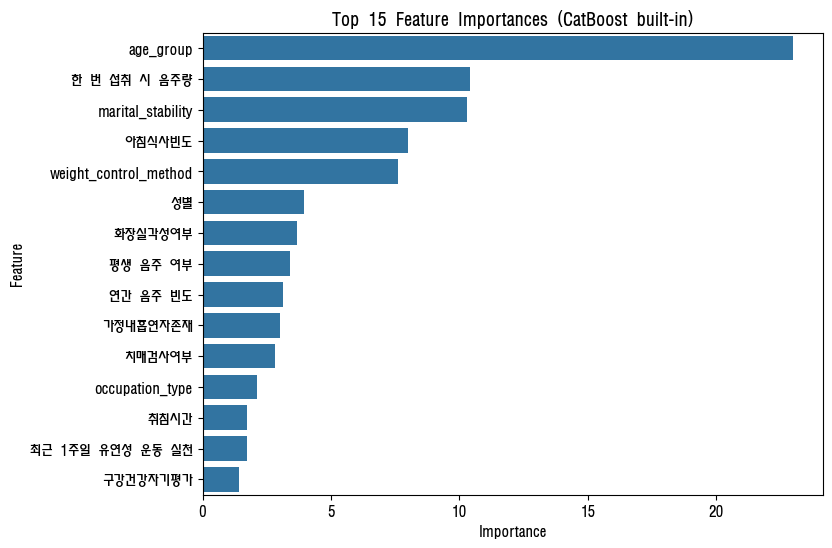

In [98]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# CatBoost 중요도
importances = best_model_.get_feature_importance()
feature_names = X_test.columns

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(
    x=importances,
    y=feature_names,
    order=feature_names[np.argsort(importances)[::-1][:15]]
)
plt.title("Top 15 Feature Importances (CatBoost built-in)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

(71857, 41) (71857,) (17965, 41) (17965,) 

0:	learn: 0.6681604	total: 155ms	remaining: 1m 17s
100:	learn: 0.7027569	total: 17s	remaining: 1m 7s
200:	learn: 0.7085322	total: 34.4s	remaining: 51.2s
300:	learn: 0.7123314	total: 51.7s	remaining: 34.2s
400:	learn: 0.7145720	total: 1m 9s	remaining: 17.1s
499:	learn: 0.7163255	total: 1m 26s	remaining: 0us
Accuracy: 0.7067074867798497


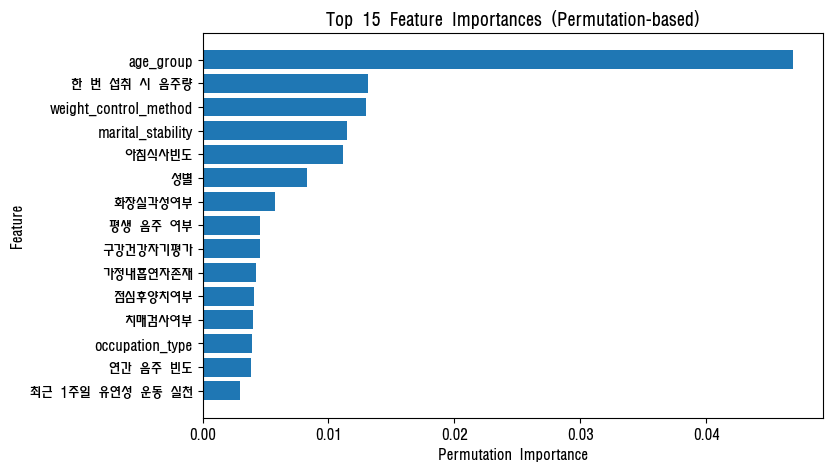

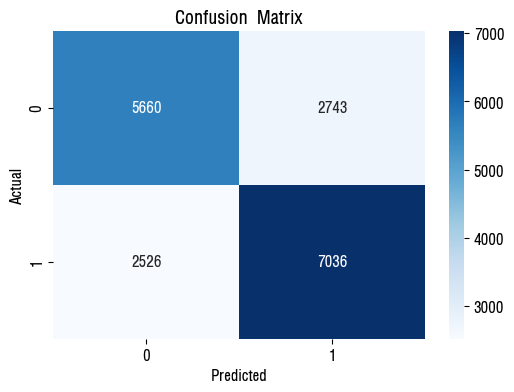

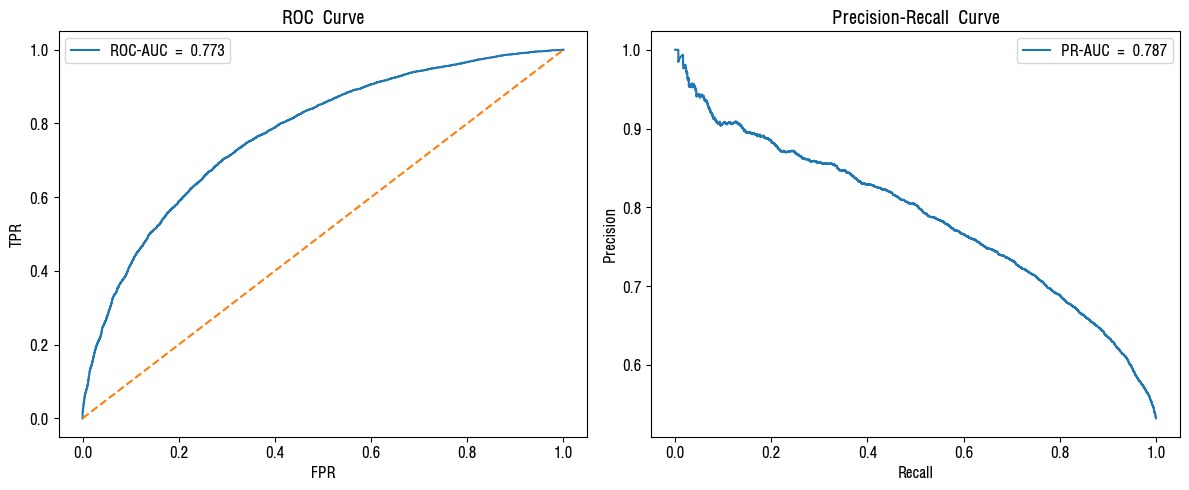

In [103]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

df_test_final = df_test.copy()

# 범주형 피처의 인덱스 번호 리스트 추출
cat_features = [i for i, dtype in enumerate(df_test_final.dtypes) if dtype == 'object']

# 범주형 컬럼 이름 리스트 추출
cat_features_names = [df_test_final.columns[i] for i in cat_features]

# 모든 범주형 컬럼 float → 문자열로 변환
for col in cat_features_names:
    df_test_final[col] = df_test_final[col].replace([np.nan, np.inf, -np.inf], 'missing').astype(str)

# 데이터 분리
X = df_test_final.drop('이탈여부', axis=1)
y = df_test_final['이탈여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')

# 학습
model_final = CatBoostClassifier(
    iterations=500,     # 트리 개수
    learning_rate=0.05, # 학습률
    depth=6,            # 트리 깊이
    cat_features=cat_features_names,  # 범주형 변수 인덱스
    eval_metric='Accuracy',
    random_state=2,
    verbose=100
)

model_final.fit(Pool(X_train, y_train, cat_features=cat_features_names))

# 예측 모델 불러오기
# import joblib
# model_final = joblib.load("results/model_train_result.pkl")

# 예측 및 평가
y_pred = model_final.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 변수중요도
result = permutation_importance(model_final, X_test, y_test, n_repeats=10, random_state=2, n_jobs=-1)

# 중요도 정렬
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.barh(np.array(X_test.columns)[sorted_idx][:15], result.importances_mean[sorted_idx][:15])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances (Permutation-based)")
plt.gca().invert_yaxis()
plt.show()

# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
y_prob = best_model_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# PR-AUC
pr_auc = average_precision_score(y_test, y_prob)
prec, recall, _ = precision_recall_curve(y_test, y_prob)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
axes[0].plot([0,1],[0,1],'--')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].set_title("ROC Curve")
axes[0].legend()

axes[1].plot(recall, prec, label=f"PR-AUC = {pr_auc:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

In [106]:
import pickle

# 모델 저장
with open('results/model_train_result.pkl', 'wb') as f:
    pickle.dump(model, f)

# 예측 결과 저장
df_pred = pd.DataFrame({
    'y_true': y_test,      # 실제값
    'y_pred': y_pred,      # 예측값
    'y_prob': y_prob       # 예측확률
})

# 결과 분석용
df_result = X_test.copy()
df_result['y_true'] = y_test.values
df_result['y_pred'] = y_pred
df_result['y_prob'] = y_prob

df_pred.to_csv('results/model_pred_result.csv', index=False, encoding='utf-8-sig')
df_result.to_csv('results/model_pred_result_analysis.csv', index=False, encoding='utf-8-sig')